In [35]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("daily-minimum-temperatures-in-me.csv",error_bad_lines=False,parse_dates=[0])

b'Skipping line 3653: expected 2 fields, saw 3\n'


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [12]:
df.isnull().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

In [37]:
df = df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'temp'})

In [38]:
df['temp'].nunique()

230

In [39]:
print('mean : ',df['temp'].value_counts().mean())
print('median : ',df['temp'].value_counts().median())
print('mode : ',df['temp'].value_counts().mode()[0])

mean :  15.869565217391305
median :  12.0
mode :  1


In [61]:
df[~df['temp'].str[0].str.isdigit()]

,Date,temp
565,1982-07-20,?0.2
566,1982-07-21,?0.8
1290,1984-07-14,?0.1


In [63]:
df['temp'] = df['temp'].apply(lambda x:x.replace('?',''))
df['temp'] = df['temp'].astype(float)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [65]:
df.describe()

,temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [71]:
print(df['Date'].dt.year.unique())
print(df['Date'].dt.year.nunique())

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990]
10


#### The data contains temperatures of about 10 years which ranges from 1981 to 1990

### Data visualization

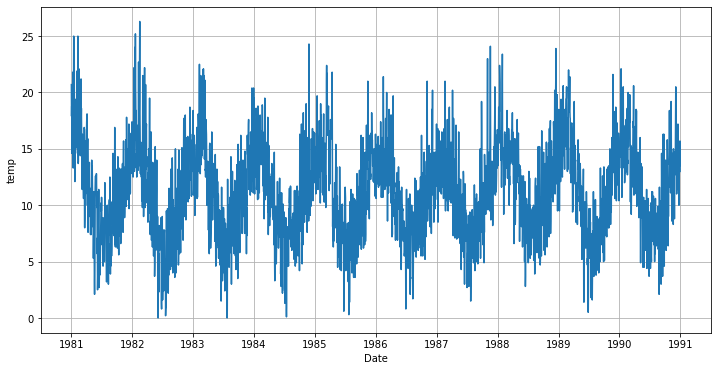

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'],y=df['temp'])
plt.grid(axis='x')
plt.grid(axis='y')
plt.show()

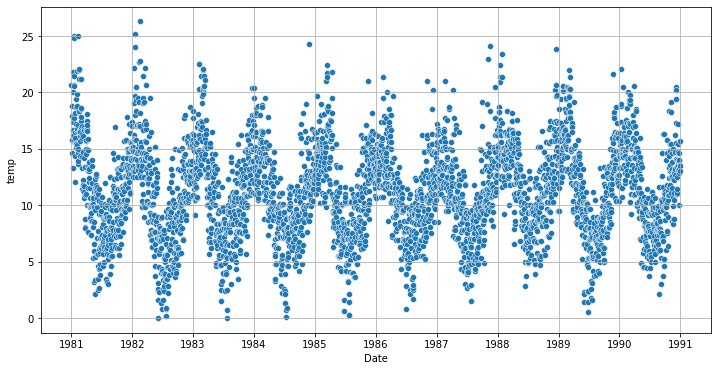

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Date'],y=df['temp'])
plt.grid(axis='x')
plt.grid(axis='y')
plt.show()

### the temperature over the years are almost constant , it's values are around  0 - 25

In [78]:
def get_trend(timeseries,deg=3):
    x = list(range(len(timeseries)))
    y = timeseries.values
    coef = np.polyfit(x,y,deg)
    trend = np.poly1d(coef)(x)
    return pd.Series(data=trend, index = timeseries.index)

df['trend'] = get_trend(df['temp'])
df.head()

,Date,temp,trend
0,1981-01-01,20.7,12.591767
1,1981-01-02,17.9,12.587840
2,1981-01-03,18.8,12.583918
3,1981-01-04,14.6,12.580001
4,1981-01-05,15.8,12.576088


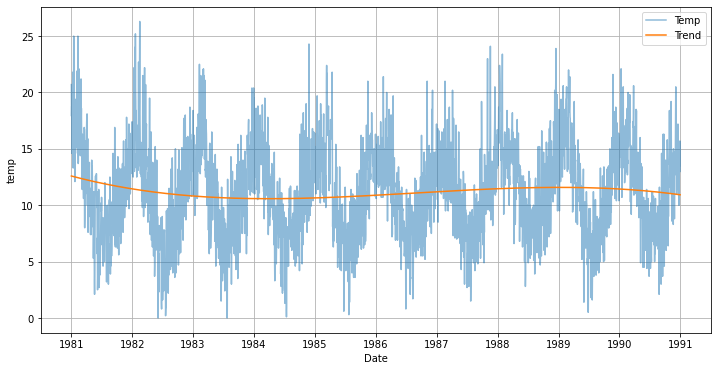

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'],y=df['temp'],alpha=0.5,label='Temp')
sns.lineplot(x=df['Date'],y=df['trend'],label='Trend')
plt.grid(axis='x')
plt.grid(axis='y')
plt.legend()
plt.show()